![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSSKP4m1vpP6cQpUQ3Ci8rYNQomSSN9OTPR3w&usqp=CAU)

<br>

# Ejercicio práctico
Una persona recibe su nómina **el último jueves de cada mes**. Desde el primer día que $Inditex$ cotiza en bolsa (*el 23-may-2001*), él ha decidido invertir al día siguiente de haber cobrado su nómima (**o si ese día no hubo cotización, el siguiente día que la haya**), la cantidad de **50€** en acciones del grupo.

La compra de las acciones la realiza al precio de **apertura de ese día de compra**. Esta persona utiliza un broker que le permite comprar acciones parciales de forma que pueda invertir siempre los 50€, pero este broker se queda en el momento de la compra con un **2%** del importe invertido.

Calcule usted el capital final obtenido si la persona realiza la venta total de sus acciones el día *28-dic-2017* **al valor del cierre de la cotización**.

>**NOTA:** *Descargue el histórico de cotización de acciones de ITX llamado* `stocks-ITX.csv` *para la realización de los cálculos* 

## Solución

Se va a trabajar con las librerias *Pandas, Numpy y Matplotlib*

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('bmh')
import numpy as np

In [2]:
#Para poder vizualizar el conjunto del dataset
pd.set_option('display.max_rows',None)

In [3]:
data = pd.read_csv('stocks-ITX.csv',sep=';')
data.head(10)

,Fecha,Cierre,Apertura
0,28-dic-2017,29.170,29.600
1,27-dic-2017,29.580,29.705
2,22-dic-2017,29.615,29.660
3,21-dic-2017,29.930,29.540
4,20-dic-2017,29.530,29.860
5,19-dic-2017,29.805,29.955
6,18-dic-2017,30.010,30.225
7,14-dic-2017,30.720,31.400
8,13-dic-2017,31.295,32.000
9,12-dic-2017,30.765,31.230


In [4]:
data.dtypes

Fecha        object
Cierre      float64
Apertura    float64
dtype: object

Averiguando si hay valores nulos

In [5]:
data.isnull().any()

Fecha       False
Cierre      False
Apertura    False
dtype: bool

*No existen valores nulos*
<br>
<br>
Invirtiendo el orden: 

In [6]:
data = data.iloc[::-1,:].reset_index(drop= True)
data.head()

,Fecha,Cierre,Apertura
0,23-may-2001,3.600,3.704
1,24-may-2001,3.608,3.600
2,25-may-2001,3.602,3.600
3,28-may-2001,3.580,3.560
4,29-may-2001,3.614,3.562


Tranformando los meses en español abreviado a cifras de dos dígitos para que la columna fecha sea variables *datetime*

In [7]:
meses_en_esp=['ene','feb','mar','abr','may','jun','jul','ago','set','oct','nov','dic']
for index, mes in enumerate(meses_en_esp):
    data['Fecha']=data['Fecha'].str.replace(mes,str(index+1).zfill(2),regex=False)    

In [8]:
data.head()

,Fecha,Cierre,Apertura
0,23-05-2001,3.600,3.704
1,24-05-2001,3.608,3.600
2,25-05-2001,3.602,3.600
3,28-05-2001,3.580,3.560
4,29-05-2001,3.614,3.562


In [9]:
data['Fecha']= pd.to_datetime(data['Fecha'])

In [10]:
data.dtypes

Fecha       datetime64[ns]
Cierre             float64
Apertura           float64
dtype: object

Las columnas `Cierre` y `Apertura` corresponden a variables decimales.<br>
Añadiendo las columnas `Mes` y `Año`  

In [11]:
data['Dia_semana']= data['Fecha'].dt.day_name()
data['Mes']= data['Fecha'].dt.month
data['Año']= data['Fecha'].dt.year

In [12]:
data.head()

,Fecha,Cierre,Apertura,Dia_semana,Mes,Año
0,2001-05-23,3.600,3.704,Wednesday,5,2001
1,2001-05-24,3.608,3.600,Thursday,5,2001
2,2001-05-25,3.602,3.600,Friday,5,2001
3,2001-05-28,3.580,3.560,Monday,5,2001
4,2001-05-29,3.614,3.562,Tuesday,5,2001


In [13]:
data.tail()

,Fecha,Cierre,Apertura,Dia_semana,Mes,Año
4213,2017-12-20,29.530,29.860,Wednesday,12,2017
4214,2017-12-21,29.930,29.540,Thursday,12,2017
4215,2017-12-22,29.615,29.660,Friday,12,2017
4216,2017-12-27,29.580,29.705,Wednesday,12,2017
4217,2017-12-28,29.170,29.600,Thursday,12,2017


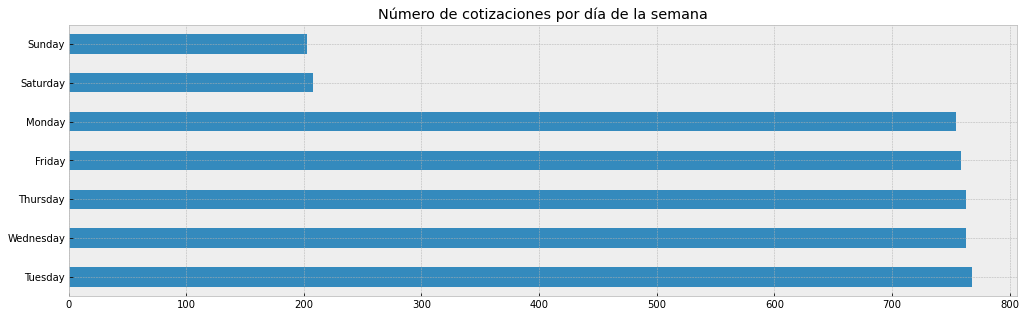

In [40]:
data.Dia_semana.value_counts().plot.barh(figsize=(17,5),title='Número de cotizaciones por día de la semana')
plt.show()

No se puede descartar que no habido cotizaciones en los fines de semana.

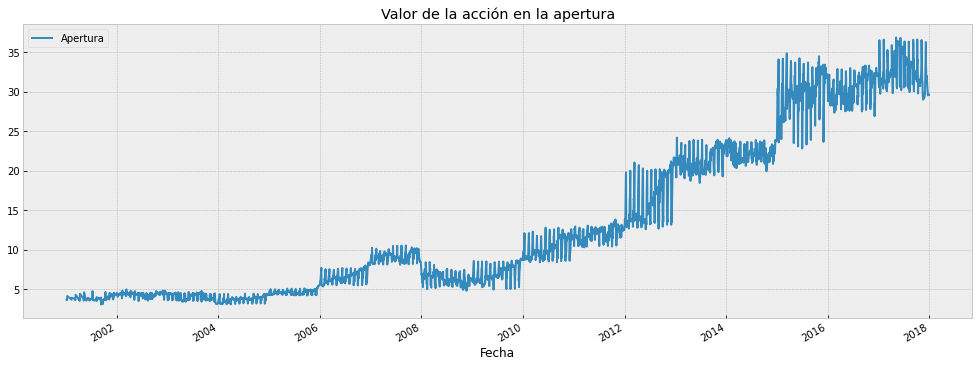

In [15]:
data.plot(x='Fecha',y='Apertura',figsize=(17,6),title='Valor de la acción en la apertura en euros')
plt.show()

Queremos añadir una columna donde indique si en aquel día la acción **se devaluó o se revalorizó**.

Existen dos caminos:

1. El primero es usando la función `where` de $numpy$:

```python
 import numpy as np
 data['Valor_acción']= np.where(data.Cierre > data.Apertura, 'revalorizó','devaluó')

```
2. El segundo es usando la función `apply` de $pandas$ pero primero se debe definir un sub programa tal y como sigue:

In [16]:
def sentencia_accion(df):
    if df.Cierre > df.Apertura:
        sentencia = 'revalorizó'
    else:
        sentencia = 'devaluó'
    return sentencia

In [17]:
data['Valor_accion']= data.apply(sentencia_accion, axis=1)

In [18]:
data.Valor_accion.value_counts()

devaluó       2132
revalorizó    2086
Name: Valor_accion, dtype: int64

Creando la tabla **calendario** donde se muestre las fechas desde *2001-05-23* hasta *2017-12-28* con sus respectivos dias de semana, meses y años

In [19]:
fecha_ini= data.Fecha[0]
fecha_fin= data.Fecha[data.shape[0]-1]
dias= fecha_fin - fecha_ini
n_dias = dias.days + 1
Fechas=[fecha_ini] 
for i in range(1,n_dias):
    Fechas.append(Fechas[i-1]+ dt.timedelta(days=1))    

In [20]:
calendario=pd.DataFrame({'Fecha':Fechas})
calendario['Dia_semana']= calendario['Fecha'].dt.day_name()
calendario['Mes']= calendario['Fecha'].dt.month
calendario['Año']= calendario['Fecha'].dt.year

In [21]:
calendario.head()

,Fecha,Dia_semana,Mes,Año
0,2001-05-23,Wednesday,5,2001
1,2001-05-24,Thursday,5,2001
2,2001-05-25,Friday,5,2001
3,2001-05-26,Saturday,5,2001
4,2001-05-27,Sunday,5,2001


In [22]:
calendario.tail()

,Fecha,Dia_semana,Mes,Año
6059,2017-12-24,Sunday,12,2017
6060,2017-12-25,Monday,12,2017
6061,2017-12-26,Tuesday,12,2017
6062,2017-12-27,Wednesday,12,2017
6063,2017-12-28,Thursday,12,2017


Creando la tabla **Compras** que indique el número de acciones comprados en los *días viernes en la última semana del mes*. 
> **OBS:** *Si en ese día no habido cotización, se seleccionará el día posterior más cercano que registre que si ha cotizado*.

In [23]:
#Creando el dataframe vacio
Compras={}
for attr in data.columns.to_list():
    Compras[attr]= []
Compras= pd.DataFrame(Compras)

In [24]:
dias_cotizacion = data.Fecha.to_list()
mes = data.Mes.iloc[0]
filtro_dia = calendario.Dia_semana.isin(['Friday'])
for año in range(2001,2018):
    if mes == 13: mes= 1
    filtro_año= calendario.Año.isin([año])
    while mes <= 12:
        filtro_mes=calendario.Mes.isin([mes])
        dias_viernes_mes = calendario[filtro_dia & filtro_mes & filtro_año]
        fecha_compra= dias_viernes_mes.Fecha.iloc[-1]
        if fecha_compra not in dias_cotizacion:
            fecha_compra =fecha_compra + dt.timedelta(days=1) 
            while fecha_compra not in dias_cotizacion:
                fecha_compra =fecha_compra + dt.timedelta(days=1) 
        datos_compra= data[data['Fecha']== fecha_compra]
        Compras= pd.concat([Compras,datos_compra])       
        mes += 1               

In [25]:
Compras

,Fecha,Cierre,Apertura,Dia_semana,Mes,Año,Valor_accion
2,2001-05-25,3.602,3.600,Friday,5.0,2001.0,revalorizó
27,2001-06-29,3.770,3.700,Friday,6.0,2001.0,revalorizó
47,2001-07-27,3.580,3.602,Friday,7.0,2001.0,devaluó
71,2001-08-31,3.850,3.760,Friday,8.0,2001.0,revalorizó
91,2001-09-28,3.700,3.562,Friday,9.0,2001.0,revalorizó
110,2001-10-26,4.100,3.912,Friday,10.0,2001.0,revalorizó
135,2001-11-30,4.308,4.220,Friday,11.0,2001.0,revalorizó
151,2001-12-28,4.282,4.280,Friday,12.0,2001.0,revalorizó
169,2002-01-25,4.510,4.502,Friday,1.0,2002.0,revalorizó
189,2002-02-22,4.400,4.392,Friday,2.0,2002.0,revalorizó


In [26]:
Compras.shape

(200, 7)

Corrigiendo `Mes` y `Año` a variables enteras

In [27]:
Compras['Mes']= Compras['Mes'].astype('int')
Compras['Año']= Compras['Año'].astype('int')

Chequeando los días de compra

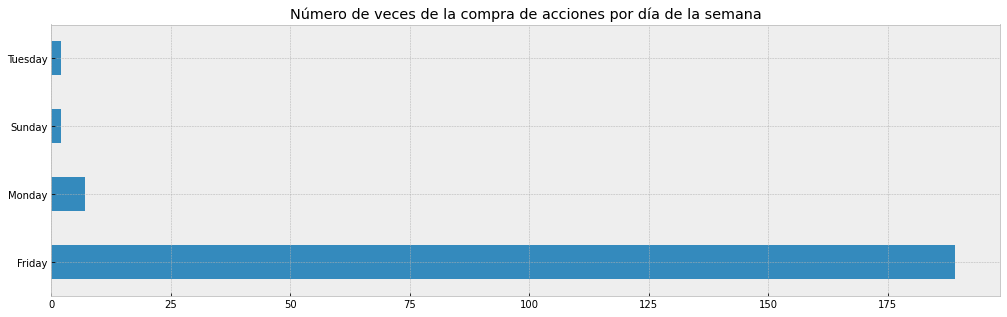

In [42]:
Compras.Dia_semana.value_counts().plot.barh(figsize=(17,5),
                                            title='Número de veces de la compra de acciones por día de la semana')
plt.show()

Como último paso, calculando el número de acciones comprados con 50 euros y el total acumulado.

In [29]:
def comprar(coste_accion):
    n_acciones=1
    while n_acciones * coste_accion * 1.02 <=50:
          n_acciones += 1
    return n_acciones -1 

In [30]:
Compras['N_acciones'] = Compras['Apertura'].apply(comprar)

In [31]:
Compras['N_acciones_acum']=np.cumsum(Compras.N_acciones)

In [32]:
Compras.head()

,Fecha,Cierre,Apertura,Dia_semana,Mes,Año,Valor_accion,N_acciones,N_acciones_acum
2,2001-05-25,3.602,3.600,Friday,5,2001,revalorizó,13,13
27,2001-06-29,3.770,3.700,Friday,6,2001,revalorizó,13,26
47,2001-07-27,3.580,3.602,Friday,7,2001,devaluó,13,39
71,2001-08-31,3.850,3.760,Friday,8,2001,revalorizó,13,52
91,2001-09-28,3.700,3.562,Friday,9,2001,revalorizó,13,65


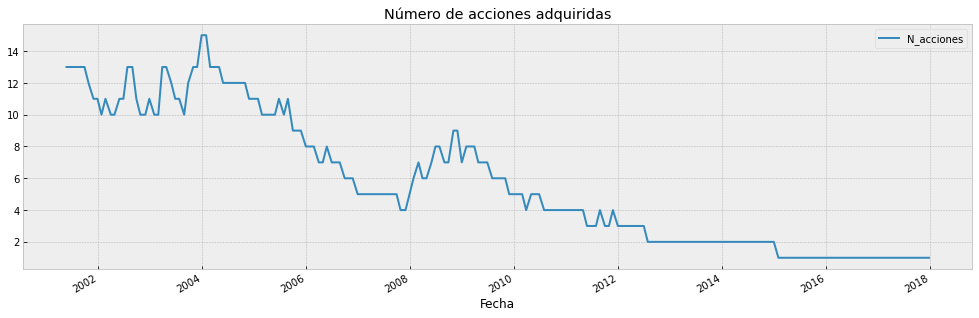

In [33]:
Compras.plot(x='Fecha',y='N_acciones',figsize=(17,5),title='Número de acciones comprados')
plt.show()

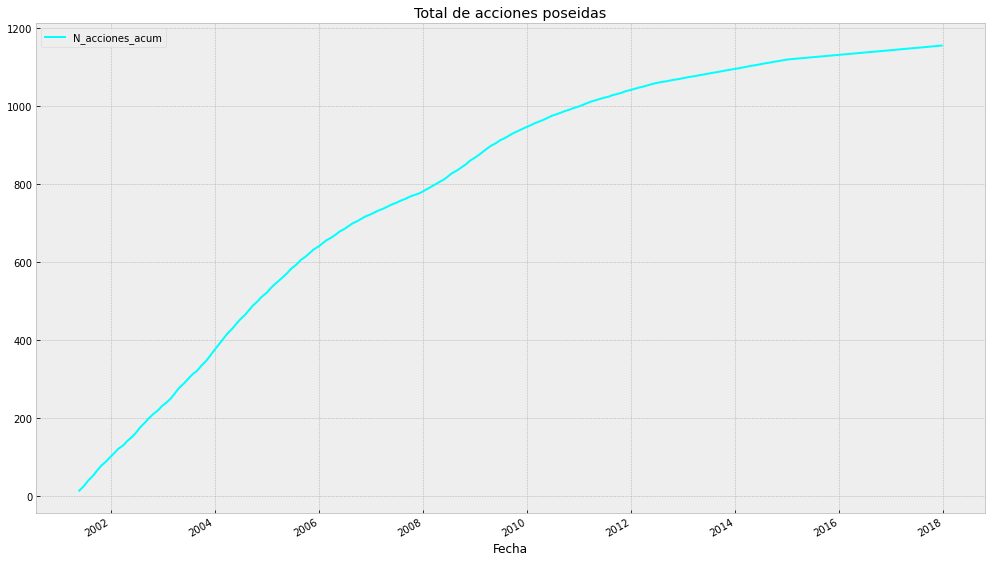

In [34]:
Compras.plot(x='Fecha',y='N_acciones_acum',figsize=(17,10),color='cyan',title='Total de acciones poseidas')
plt.show()

Por si acaso, chequeando el valor total de acciones compradas añadiendo la columna del valor total de las acciones

In [35]:
Compras['Valor_total_comprados']=Compras['Apertura']*Compras['N_acciones']

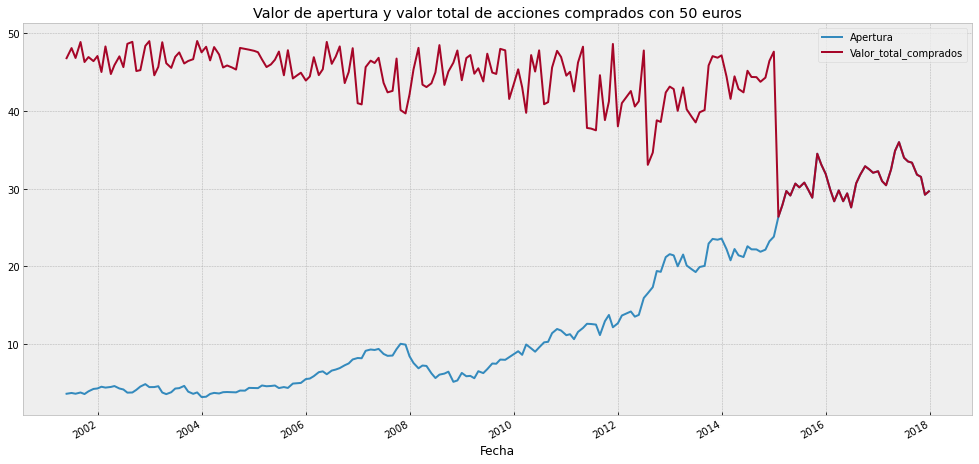

In [36]:
Compras.plot(x='Fecha',y=['Apertura','Valor_total_comprados'],
             figsize=(17,8),title='Valor de apertura y valor total de acciones comprados con 50 euros')
plt.show()

Calculando el valor de la venta de todas sus acciones al día de 28 de diciembre de 2017 respecto al valor de cierre:

In [37]:
resultado= Compras.N_acciones.sum()*data.Cierre.iloc[-1]
resultado =  str(resultado).replace('.',',')
print('Valor total de las acciones vendidas: {0} euros'.format(resultado))

Valor total de las acciones vendidas: 33662,18 euros
